In [138]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# カレントディレクトリの移動・確認
%cd drive/MyDrive/cnn_visualization_workspace
!pwd

[Errno 2] No such file or directory: 'drive/MyDrive/cnn_visualization_workspace'
/content/drive/MyDrive/cnn_visualization_workspace
/content/drive/My Drive/cnn_visualization_workspace


In [140]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

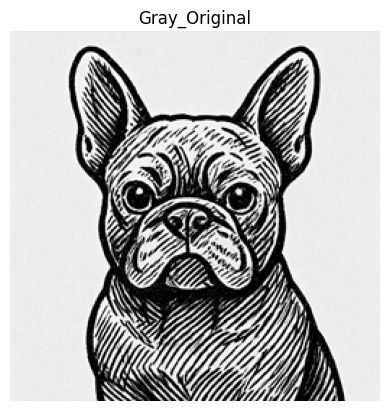

In [141]:
# 画像読み込み（グレースケール）
img_gray = cv2.imread("data/input/inu_grayscale_256.jpg", cv2.IMREAD_GRAYSCALE)

# 表示
plt.imshow(img_gray, cmap='gray')
plt.title("Gray_Original")
plt.axis("off")
plt.show()

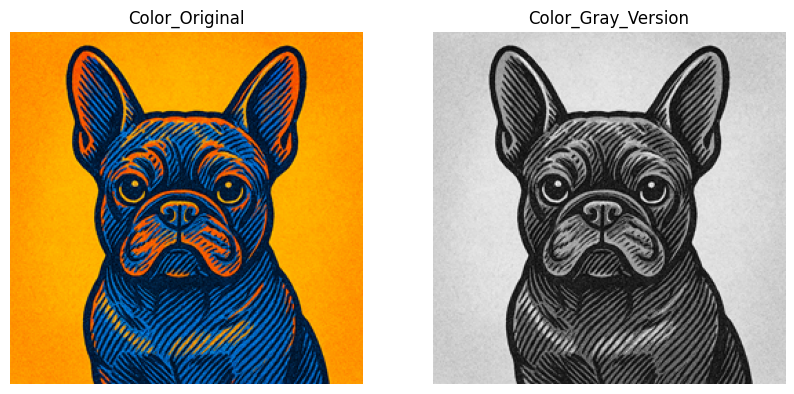

In [142]:
# 画像読み込み（カラー）
img_color = cv2.imread("data/input/inu_color_256.jpg", cv2.IMREAD_COLOR)
# BGR → RGB に変換（matplotlib表示にも使える）
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_color_rgb_gray = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2GRAY)

# 表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# オリジナルカラー画像
axs[0].imshow(img_color_rgb)
axs[0].set_title("Color_Original")
axs[0].axis("off")
# オリジナルカラー画像をグレースケール化した画像
axs[1].imshow(img_color_rgb_gray, cmap='gray')
axs[1].set_title("Color_Gray_Version")
axs[1].axis("off")
plt.show()

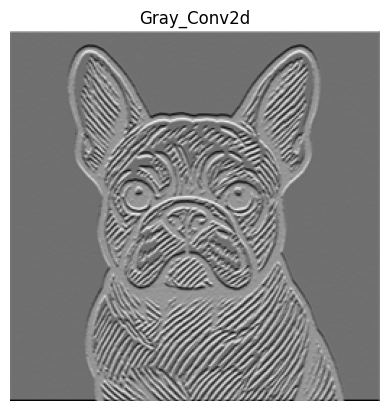

In [143]:
# 画像読み込み（グレースケール、畳み込み処理後）
img_gray_conv2d = cv2.imread("data/outputs/feature_map/TensorFlow_auto_filters/0_feature_map_auto_filter_0_gray.png", cv2.IMREAD_GRAYSCALE)

# 表示
plt.imshow(img_gray_conv2d, cmap='gray')
plt.title("Gray_Conv2d")
plt.axis("off")
plt.show()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

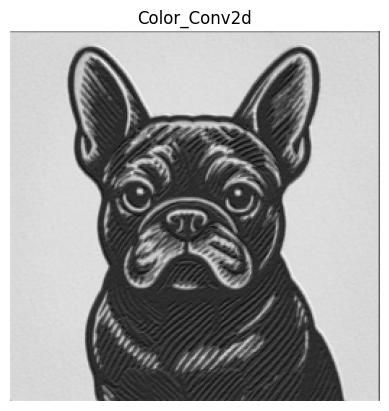

In [144]:
# 画像読み込み（カラー、畳み込み処理後）
img_color_conv2d = cv2.imread("data/outputs/feature_map/TensorFlow_auto_filters/0_feature_map_auto_filter_0_color.png", cv2.IMREAD_GRAYSCALE)

# 表示
plt.imshow(img_color_conv2d, cmap='gray')
plt.title("Color_Conv2d")
plt.axis("off")
# plt.show()

In [145]:
# 前処理
# 正規化と型変換
img_gray_tf_input = img_gray.astype("float32") / 255.0
img_color_tf_input = img_color.astype("float32") / 255.0
img_gray_conv2d_tf_input = img_gray_conv2d.astype("float32") / 255.0
img_color_conv2d_tf_input  = img_color_conv2d.astype("float32") / 255.0

# Tensorに変換
img_gray_tf_input = tf.convert_to_tensor(img_gray_tf_input.reshape(1, 256, 256, 1), dtype=tf.float32)
img_color_tf_input = tf.convert_to_tensor(img_color_tf_input.reshape(1, 256, 256, 3), dtype=tf.float32)
img_gray_conv2d_tf_input = tf.convert_to_tensor(img_gray_conv2d_tf_input.reshape(1, 256, 256, 1), dtype=tf.float32)
img_color_conv2d_tf_input = tf.convert_to_tensor(img_color_conv2d_tf_input.reshape(1, 256, 256, 1), dtype=tf.float32)

In [146]:
# 畳み込みレイヤー（3x3カーネル, 8フィルタ, ストライド1）ランダム生成なので実行毎に値が変わります
conv_layer = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', use_bias=False)

# プーリングレイヤー（共通）(2x2のウィンドウサイズ, ストライド2)
pool_layer = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same')

In [147]:
# プーリング処理を行う
pooled_gray = pool_layer(img_gray_tf_input)
pooled_color = pool_layer(img_color_tf_input)
pooled_gray_conv2d = pool_layer(img_gray_conv2d_tf_input)
pooled_color_conv2d = pool_layer(img_color_conv2d_tf_input)

pooleds_dict = {'pooled_gray': pooled_gray, 'pooled_color': pooled_color, 'pooled_gray_conv2d': pooled_gray_conv2d, 'pooled_color_conv2d': pooled_color_conv2d}

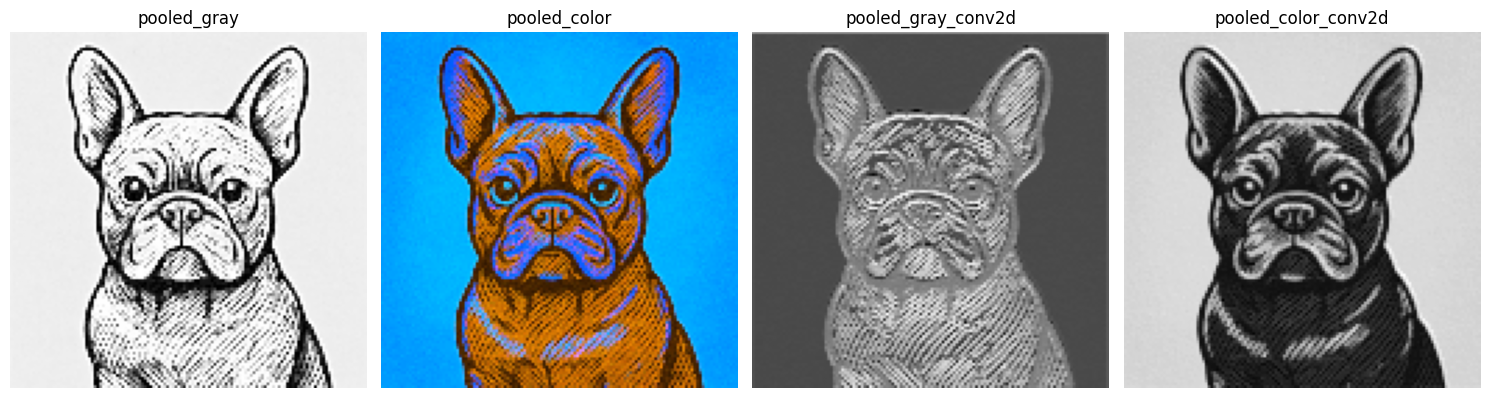

In [148]:
# 描画
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
for i, (name, pooled) in enumerate(pooleds_dict.items()):
    pooled_img = pooled.numpy().squeeze()
    axs[i].imshow(pooled_img, cmap='gray')
    axs[i].set_title(name)
    axs[i].axis("off")
plt.tight_layout()
plt.show()

In [149]:
# 畳み込み処理を行う
conv2d_gray = conv_layer(img_gray_tf_input)

# 畳み込みレイヤーを再定義してカラー画像をinput（3x3カーネル, 8フィルタ, ストライド1）ランダム生成なので実行毎に値が変わります
conv_layer = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', use_bias=False)
conv2d_color = conv_layer(img_color_tf_input)
# プーリング処理を行う
conv2d_pooled_grays = pool_layer(conv2d_gray)
conv2d_pooled_colors = pool_layer(conv2d_color)


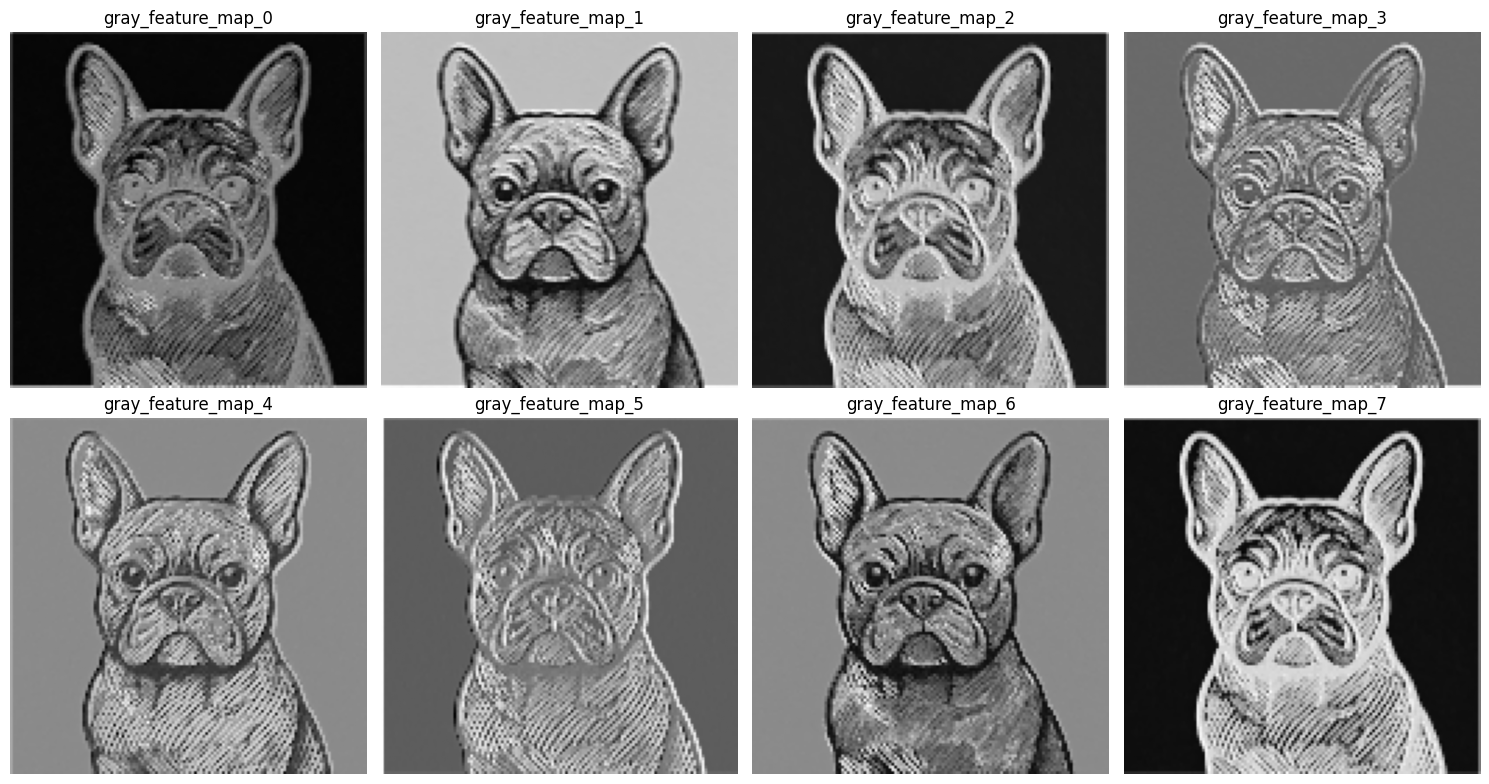

In [150]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
conv2d_pooled_grays = conv2d_pooled_grays.numpy().squeeze()
for i in range(conv2d_pooled_grays.shape[2]):
    conv2d_pooled_gray = conv2d_pooled_grays[:, :, i]
    if i < 4:
      axs[0, i].imshow(conv2d_pooled_gray, cmap='gray')
      axs[0, i].set_title(f'gray_feature_map_{i}')
      axs[0, i].axis("off")
    else:
      axs[1, i-4].imshow(conv2d_pooled_gray, cmap='gray')
      axs[1, i-4].set_title(f'gray_feature_map_{i}')
      axs[1, i-4].axis("off")
    # 最小値と最大値に基づいてスケーリング（逆正規化）（0〜255）
    feature_map_norm = (conv2d_pooled_gray - conv2d_pooled_gray.min()) / (conv2d_pooled_gray.max() - conv2d_pooled_gray.min()) * 255
    gray_img_uint8 = feature_map_norm.astype(np.uint8)
    # 保存
    cv2.imwrite(f"data/outputs/feature_map/conv_pooling/{i}_feature_map_conv_pooled_{i}_gray.png", gray_img_uint8) # 画像
plt.tight_layout()
plt.show()

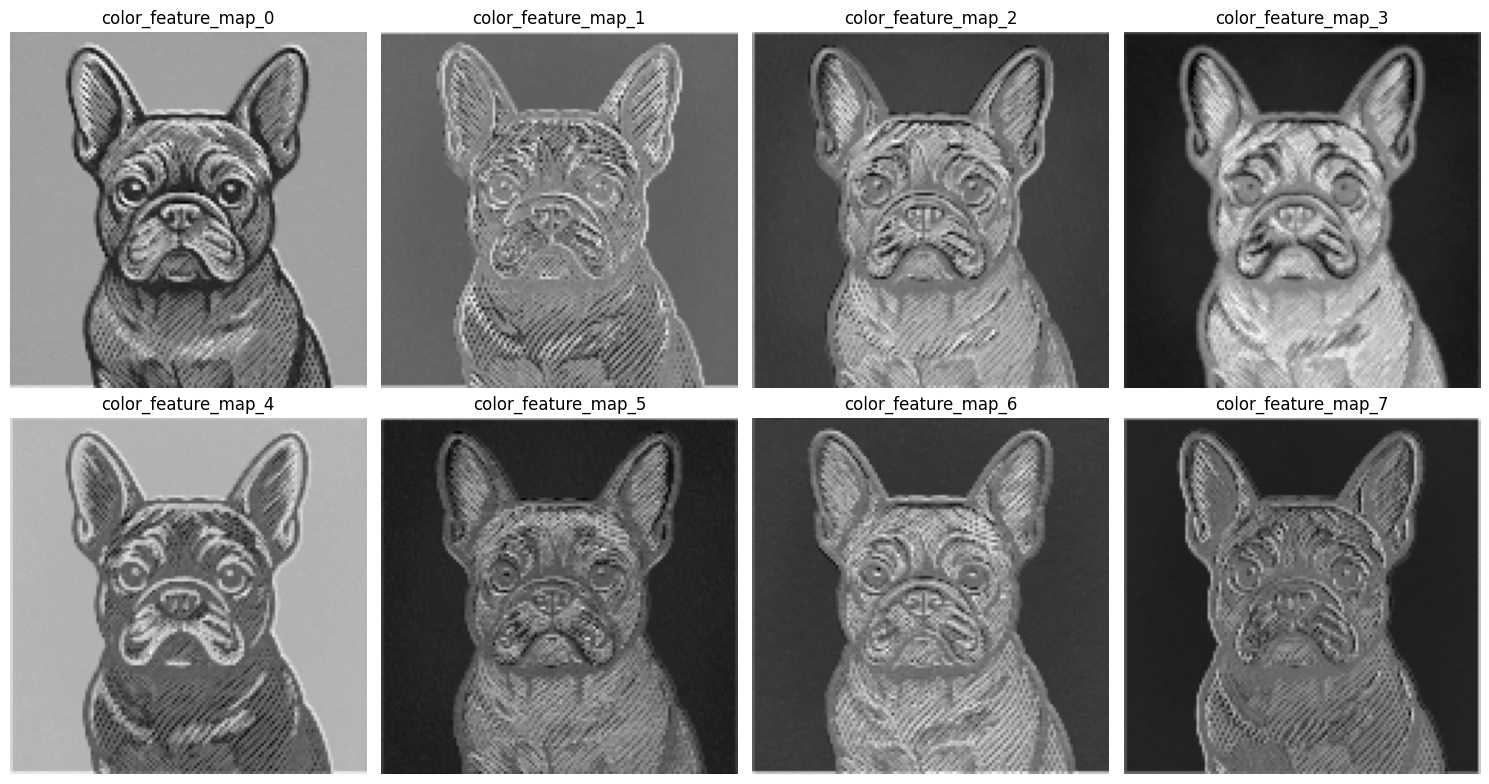

In [151]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
conv2d_pooled_colors = conv2d_pooled_colors.numpy().squeeze()
for i in range(conv2d_pooled_colors.shape[2]):
    conv2d_pooled_color = conv2d_pooled_colors[:, :, i]
    if i < 4:
      axs[0, i].imshow(conv2d_pooled_color, cmap='gray')
      axs[0, i].set_title(f'color_feature_map_{i}')
      axs[0, i].axis("off")
    else:
      axs[1, i-4].imshow(conv2d_pooled_color, cmap='gray')
      axs[1, i-4].set_title(f'color_feature_map_{i}')
      axs[1, i-4].axis("off")
    # 最小値と最大値に基づいてスケーリング（逆正規化）（0〜255）
    feature_map_norm = (conv2d_pooled_color - conv2d_pooled_color.min()) / (conv2d_pooled_color.max() - conv2d_pooled_color.min()) * 255
    color_img_uint8 = feature_map_norm.astype(np.uint8)
    # 保存
    cv2.imwrite(f"data/outputs/feature_map/conv_pooling/{i}_feature_map_conv_pooled_{i}_color.png", color_img_uint8) # 画像
plt.tight_layout()
plt.show()